<a href="https://colab.research.google.com/github/hxri/Deep-Learning-Lab/blob/main/Experiment_8_MLP_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Boston Housing Dataset

In [1]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [2]:
data.shape

(506, 13)

In [3]:
target.shape

(506,)

In [4]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data, target,
                                                    random_state=1)

In [6]:
regr = MLPRegressor(random_state=1, max_iter=1500, verbose=True, activation = 'relu', solver = 'adam').fit(X_train, y_train)

Iteration 1, loss = 949.34709197
Iteration 2, loss = 429.97817914
Iteration 3, loss = 209.12780984
Iteration 4, loss = 196.06894281
Iteration 5, loss = 230.98998797
Iteration 6, loss = 222.74934074
Iteration 7, loss = 164.01063331
Iteration 8, loss = 92.69774288
Iteration 9, loss = 48.34590551
Iteration 10, loss = 38.91973242
Iteration 11, loss = 53.49383791
Iteration 12, loss = 66.19313121
Iteration 13, loss = 65.25256473
Iteration 14, loss = 53.99686245
Iteration 15, loss = 41.86547745
Iteration 16, loss = 39.27990067
Iteration 17, loss = 42.35583551
Iteration 18, loss = 46.12654714
Iteration 19, loss = 44.62935850
Iteration 20, loss = 38.61495036
Iteration 21, loss = 33.46540417
Iteration 22, loss = 30.93590485
Iteration 23, loss = 31.39529288
Iteration 24, loss = 32.29749254
Iteration 25, loss = 31.71043669
Iteration 26, loss = 30.13437558
Iteration 27, loss = 28.83779518
Iteration 28, loss = 28.91413391
Iteration 29, loss = 29.35882461
Iteration 30, loss = 29.40021043
Iteration 31

In [7]:
y_pred = regr.predict(X_test)
df_temp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_temp.head()

,Actual,Predicted
0,28.2,33.714994
1,23.9,28.211548
2,16.6,22.103730
3,22.0,24.307633
4,20.8,27.952484


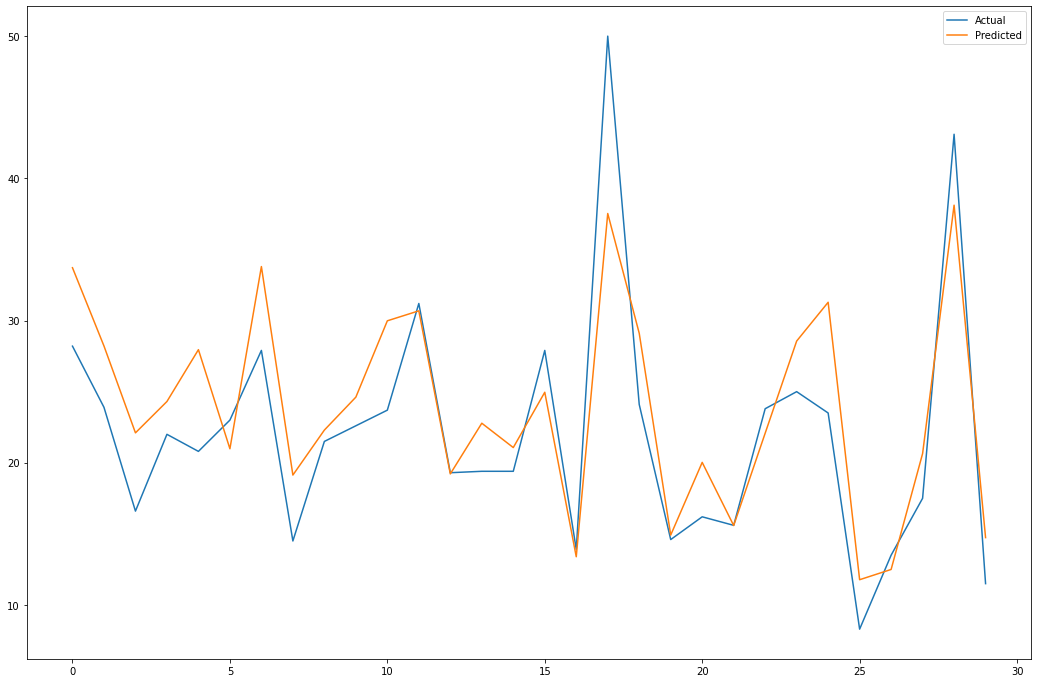

In [8]:
import matplotlib.pyplot as plt
df_temp = df_temp.head(30)
df_temp.plot(kind='line',figsize=(18,12))
plt.show()

In [9]:
from sklearn import metrics

score = regr.score(X_test, y_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

print('Score:', score)
print('MAE:', mae)  
print('MSE:', mse)  
print('RMSE:', rmse)
print('R2:', r2)

MAE: 3.2361323094674703
MSE: 18.866813625399114
RMSE: 4.343594551221271
R2: 0.8095386194846532


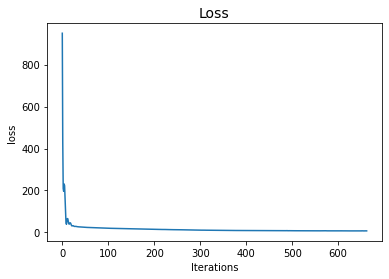

In [10]:
plt.plot(regr.loss_curve_)
plt.title("Loss", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('loss')
plt.show()

# Make Regressor Dataset

In [11]:
import pandas as pd
import numpy as np

data, target = X_test, y_test = make_regression(n_samples=650, n_features=12, noise=10)

In [12]:
data.shape

(650, 12)

In [13]:
target.shape

(650,)

In [14]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data, target,
                                                    random_state=1)

In [16]:
regr = MLPRegressor(random_state=1, max_iter=5000, verbose=True, activation = 'relu', solver = 'adam').fit(X_train, y_train)

Iteration 1, loss = 17529.39495156
Iteration 2, loss = 17517.11620401
Iteration 3, loss = 17504.48229584
Iteration 4, loss = 17492.69347428
Iteration 5, loss = 17480.89540322
Iteration 6, loss = 17468.05027883
Iteration 7, loss = 17455.79040484
Iteration 8, loss = 17443.21479257
Iteration 9, loss = 17430.39121232
Iteration 10, loss = 17417.44029041
Iteration 11, loss = 17403.72691923
Iteration 12, loss = 17390.00184768
Iteration 13, loss = 17375.22659214
Iteration 14, loss = 17360.83472434
Iteration 15, loss = 17345.19449371
Iteration 16, loss = 17328.94766153
Iteration 17, loss = 17312.30035969
Iteration 18, loss = 17294.71576491
Iteration 19, loss = 17276.62079580
Iteration 20, loss = 17257.63178596
Iteration 21, loss = 17237.92759372
Iteration 22, loss = 17216.64158018
Iteration 23, loss = 17195.56148860
Iteration 24, loss = 17172.52343418
Iteration 25, loss = 17149.33179422
Iteration 26, loss = 17125.13409169
Iteration 27, loss = 17099.60565925
Iteration 28, loss = 17072.40896743
I

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [17]:
y_pred = regr.predict(X_test)
df_temp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_temp.head()

,Actual,Predicted
0,-341.191538,-336.906544
1,6.671825,-7.774184
2,-19.570768,-31.921661
3,-61.124569,-36.293827
4,44.492834,47.608693


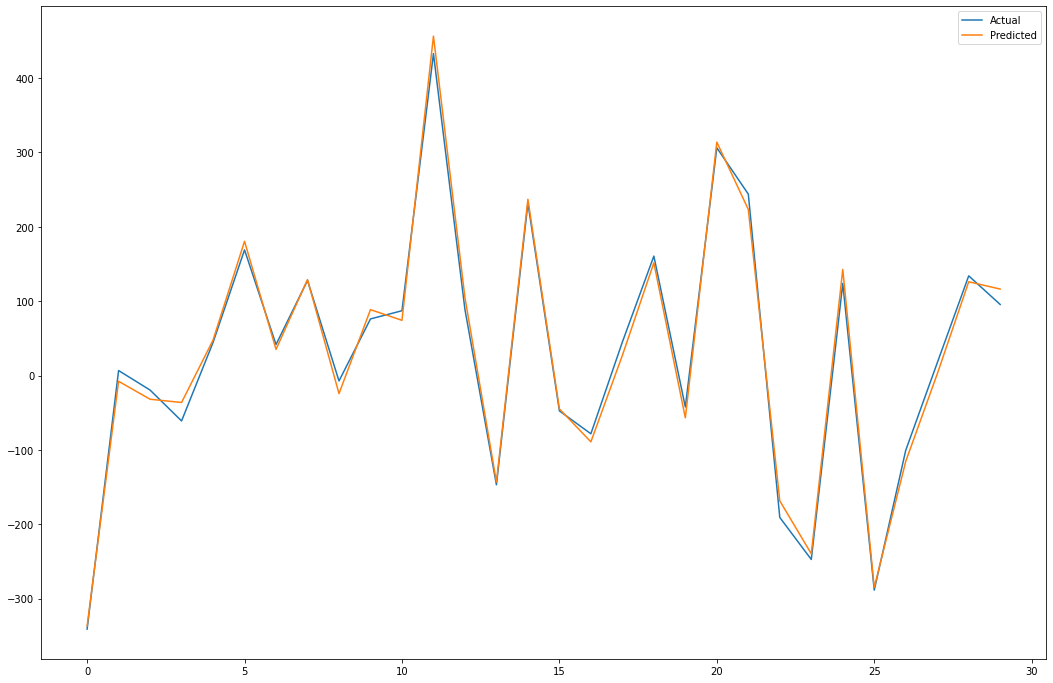

In [18]:
import matplotlib.pyplot as plt
df_temp = df_temp.head(30)
df_temp.plot(kind='line',figsize=(18,12))
plt.show()

In [19]:
from sklearn import metrics

score = regr.score(X_test, y_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

print('Score:', score)
print('MAE:', mae)  
print('MSE:', mse)  
print('RMSE:', rmse)
print('R2:', r2)

MAE: 9.885048539248045
MSE: 153.5633693188552
RMSE: 12.39206880705781
R2: 0.9960167389945968


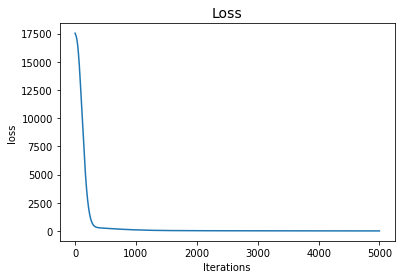

In [20]:
plt.plot(regr.loss_curve_)
plt.title("Loss", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('loss')
plt.show()

# California Housing Dataset

In [21]:
import pandas as pd
import numpy as np

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
data = housing['data']
target = housing['target']

In [22]:
data.shape

(20640, 8)

In [23]:
target.shape

(20640,)

In [24]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(data, target,
                                                    random_state=1)

In [26]:
regr = MLPRegressor(random_state=1, max_iter=1500, verbose=True, activation = 'relu', solver = 'adam').fit(X_train, y_train)

Iteration 1, loss = 4815.41129664
Iteration 2, loss = 4.95776130
Iteration 3, loss = 1.19951044
Iteration 4, loss = 0.77680309
Iteration 5, loss = 0.65522118
Iteration 6, loss = 0.56572541
Iteration 7, loss = 0.50557013
Iteration 8, loss = 0.46232338
Iteration 9, loss = 0.44012722
Iteration 10, loss = 0.41614320
Iteration 11, loss = 0.41266763
Iteration 12, loss = 0.38320987
Iteration 13, loss = 0.38959431
Iteration 14, loss = 0.36686123
Iteration 15, loss = 0.36471476
Iteration 16, loss = 0.36127965
Iteration 17, loss = 0.34582155
Iteration 18, loss = 0.34599668
Iteration 19, loss = 0.34470406
Iteration 20, loss = 0.33675579
Iteration 21, loss = 0.33457746
Iteration 22, loss = 0.33960411
Iteration 23, loss = 0.34058884
Iteration 24, loss = 0.32258352
Iteration 25, loss = 0.32886755
Iteration 26, loss = 0.34061341
Iteration 27, loss = 0.32327538
Iteration 28, loss = 0.34014204
Iteration 29, loss = 0.34367079
Iteration 30, loss = 0.32181718
Iteration 31, loss = 0.31509890
Iteration 32, 

In [27]:
y_pred = regr.predict(X_test)
df_temp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_temp.head()

,Actual,Predicted
0,3.550,2.238251
1,0.707,1.218648
2,2.294,2.450768
3,1.125,0.910503
4,2.254,3.251653


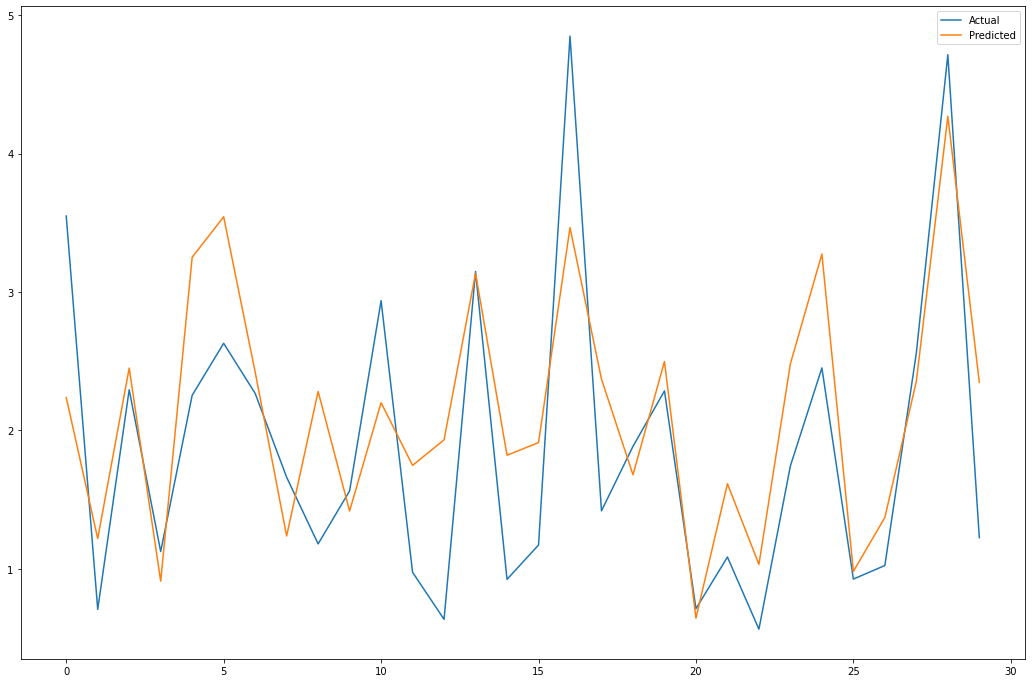

In [28]:
import matplotlib.pyplot as plt
df_temp = df_temp.head(30)
df_temp.plot(kind='line',figsize=(18,12))
plt.show()

In [33]:
from sklearn import metrics

score = regr.score(X_test, y_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

print('Score:', score)
print('MAE:', mae)  
print('MSE:', mse)  
print('RMSE:', rmse)
print('R2:', r2)

Score: 0.5261964220149624
MAE: 0.6102789092752869
MSE: 0.6235535431027416
RMSE: 0.7896540654633152
R2: 0.5261964220149624


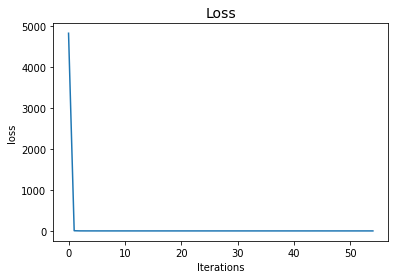

In [30]:
plt.plot(regr.loss_curve_)
plt.title("Loss", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('loss')
plt.show()